In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load dataset
df = pd.read_csv('../data/raw/house_data.csv')
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (84, 7)


In [5]:
print(df.head())

     price  sqft  bedrooms  bathrooms    location  year_built  condition
0   495000  1527         2        1.5      Suburb        1956       Good
1   752000  2526         3        2.5    Downtown        1998  Excellent
2   319000  1622         2        1.5       Rural        1975       Fair
3  1210000  3102         4        3.0  Waterfront        2005  Excellent
4   462000  1835         2        2.0       Urban        1982       Good


In [6]:
print('Data typpes and null values: ')
print(df.info())

Data typpes and null values: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None


In [7]:
print(f'Missing Values:')
print(df.isnull().sum())

Missing Values:
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [8]:
df = df.dropna()
df = df[df['price'] > 1000]
df = df[df['sqft'] > 200]

In [9]:
print("\n🧹 Cleaning column names (lowercase, underscores)...")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Column names standardized:")
print(df.columns.tolist())


🧹 Cleaning column names (lowercase, underscores)...
✅ Column names standardized:
['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


In [10]:
print('Description of the dataset ')
print(df.describe())

Description of the dataset 
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000


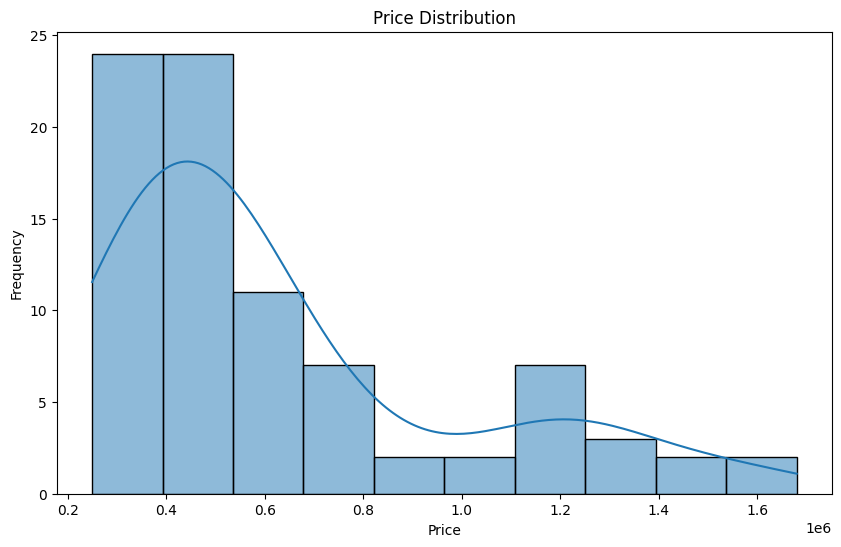

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [17]:
# get the name of all columns
all_columns = df.columns.tolist()
print(f'All columns: {all_columns}')

All columns: ['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


In [20]:
for col in all_columns:
    try:
        invalid = df[df[col] < 0]
        if not invalid.empty:
            print(f"Invalid values found in column '{col}':")
            print(invalid[col].unique())
        else:
            print(f"All values in column '{col}' are valid.")
    except TypeError:
        print(f"Column '{col}' is not numeric, skipping validation.")

All values in column 'price' are valid.
All values in column 'sqft' are valid.
All values in column 'bedrooms' are valid.
All values in column 'bathrooms' are valid.
Column 'location' is not numeric, skipping validation.
All values in column 'year_built' are valid.
Column 'condition' is not numeric, skipping validation.


In [21]:
# check for duplicates
duplicates = df.duplicated()
if duplicates.any():
    print(f"Duplicate rows found: {duplicates.sum()}")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [22]:
# saveing the cleaned dataset
df.to_csv('../data/processed/cleaned_house_data.csv')
print("Cleaned dataset saved to '../data/processed/cleaned_house_data.csv'")


Cleaned dataset saved to '../data/processed/cleaned_house_data.csv'
